In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split

In [56]:
#Create a 2D cluster of 50 points with mean: 
number_points = 50
mean0 = (20, 30) #mean_x, mean_y
cov0 = [[3, 0], [0, 10]] #s_x = 3, s_y = 20
Data0 = np.random.multivariate_normal(mean0, cov0, number_points)   # red = 0
Data0 = np.concatenate((Data0, np.zeros((number_points, 1))), axis=1)
#Create a 2D cluster of 50 points with mean: 
mean1 = (40, 40) #mean_x, mean_y
cov1 = [[10, 0], [0, 10]] #s_x = 10, s_y = 10
Data1 = np.random.multivariate_normal(mean1, cov1, number_points)  # blue = 1
Data1 = np.concatenate((Data1, np.ones((number_points, 1))), axis=1)
#Create a 2D cluster of 50 points with mean: 
mean2 = (50, 40) #mean_x, mean_y
cov2 = [[15, 0], [0, 15]] #s_x = 15, s_y = 15
Data2= np.random.multivariate_normal(mean2, cov2, number_points)  # yellow = 2
Data2 = np.concatenate((Data2, 2*np.ones((number_points, 1))), axis=1)

In [57]:
Data = np.concatenate((Data0, Data1, Data2), axis=0)
features = Data[:, 0:2]
labels = Data[:, 2]

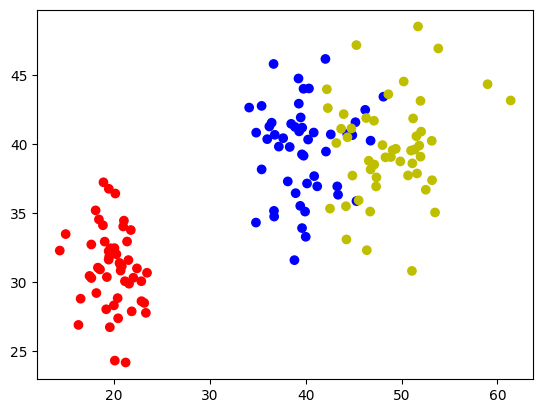

In [58]:
# Define a custom colormap
cmap = colors.ListedColormap(['r', 'b', 'y'])
# Plot the scatter plot with the custom colormap
plt.scatter(Data[:,0], Data[:,1], c=Data[:,2], cmap=cmap)
plt.show()

In [59]:
training_features, testing_features, training_labels, testing_labels = train_test_split(features, labels, test_size=0.3, random_state=42)
print("\nTraining features: \n", training_features)
print("\nTraining Labels: \n", training_labels) 
print("\nTesting Labels: \n", testing_labels) 


Training features: 
 [[35.98035218 40.35302064]
 [42.30317491 42.60639001]
 [51.97400315 43.13093574]
 [39.92973682 35.09658313]
 [44.76473469 41.13056451]
 [39.60473828 39.25087423]
 [51.12597383 38.59696554]
 [34.80333384 34.29986527]
 [22.83928816 30.04519388]
 [45.28605377 47.17452233]
 [46.76648823 40.24274588]
 [20.42004302 27.35527242]
 [19.42943562 32.22349222]
 [18.89144092 37.22155622]
 [35.39238939 42.7635751 ]
 [53.17979987 37.37243396]
 [19.97618976 28.29190494]
 [21.35251542 32.9245617 ]
 [14.94604322 33.46458138]
 [38.47864666 41.46162187]
 [21.74311452 33.75707545]
 [39.77808843 39.14903467]
 [46.308179   41.88530825]
 [23.43385675 30.6568982 ]
 [38.87877253 41.23881523]
 [47.11961646 41.68575535]
 [18.52785598 30.90021886]
 [44.19532936 35.48557992]
 [43.95869174 42.1683819 ]
 [39.31010927 40.9168382 ]
 [39.99766522 33.26882754]
 [46.76641865 38.15558473]
 [40.87918074 37.66931309]
 [20.12799642 36.40647943]
 [39.63049153 41.18652846]
 [50.22287543 44.53403184]
 [23.3

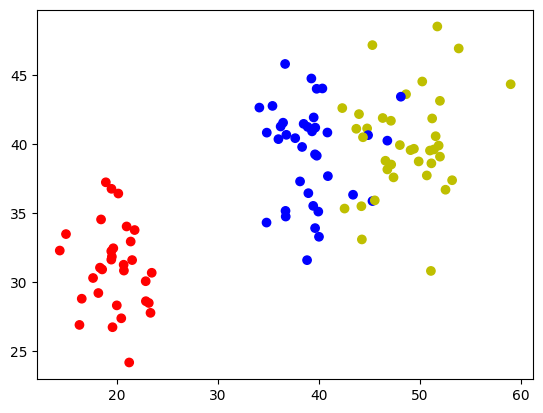

In [60]:
# plot train data
plt.scatter(training_features[:,0], training_features[:,1], c=training_labels, cmap=cmap)

In [61]:
# use KNN with K = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_features, training_labels)
predicted_labels = knn.predict(testing_features)
print ("\nPredicted class labels: \n", predicted_labels)
print("\nCorrect Testing class labels: \n", testing_labels)


Predicted class labels: 
 [1. 0. 2. 1. 2. 0. 1. 2. 2. 1. 1. 0. 0. 0. 0. 2. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 2. 2. 0. 0.]

Correct Testing class labels: 
 [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 0.]


In [62]:
print ("Test data where predicted label equals the test label: \n", testing_labels == predicted_labels)
number_correct = (testing_labels == predicted_labels).sum()
print ("\nNumber of correct predictions: %d. Out of total test cases %d." %(number_correct, testing_labels.shape[0]) )

Test data where predicted label equals the test label: 
 [ True  True  True  True False  True  True  True False  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True]

Number of correct predictions: 39. Out of total test cases 45.


In [63]:
# tatal accuracy
accuracy = (testing_labels == predicted_labels).sum()/testing_labels.shape[0]
print ("\nAccuracy: %5.2f%%" %accuracy)


Accuracy:  0.87%


In [64]:
neighbor_size = []
errors_list = []
for k in range (2, 20): 
  classifier = KNeighborsClassifier(n_neighbors = k)
  knn.fit(training_features, training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels) 
  predicted_labels = knn.predict(testing_features)  #use the model obtained in previous step to predict labels for testing features
  accuracy_percent = (testing_labels == predicted_labels).sum()/testing_labels.shape[0]
  # Calculating the % Accuracy of the prediction. 
  print("Prediction Accuracy for k = %2d : %5.2f%%" % (k, accuracy_percent)) #%% escapes the formatting % to print '%'
  neighbor_size.append(k)
  errors_list.append(100-accuracy_percent)

print (" K = ", neighbor_size, "\n", "Errors = ", errors_list)

Prediction Accuracy for k =  2 :  0.87%
Prediction Accuracy for k =  3 :  0.87%
Prediction Accuracy for k =  4 :  0.87%
Prediction Accuracy for k =  5 :  0.87%
Prediction Accuracy for k =  6 :  0.87%
Prediction Accuracy for k =  7 :  0.87%
Prediction Accuracy for k =  8 :  0.87%
Prediction Accuracy for k =  9 :  0.87%
Prediction Accuracy for k = 10 :  0.87%
Prediction Accuracy for k = 11 :  0.87%
Prediction Accuracy for k = 12 :  0.87%
Prediction Accuracy for k = 13 :  0.87%
Prediction Accuracy for k = 14 :  0.87%
Prediction Accuracy for k = 15 :  0.87%
Prediction Accuracy for k = 16 :  0.87%
Prediction Accuracy for k = 17 :  0.87%
Prediction Accuracy for k = 18 :  0.87%
Prediction Accuracy for k = 19 :  0.87%
 K =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 Errors =  [99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.13333333333334, 99.133